# Triplets and Triplet loss training procedure

Whereas standard loss functions used in Machine and Deep Learning, such as Mean Squared Error or Cross-Entropy, predict values or labels given one or more inputs; ranking loss functions (e.g. Contrastive, Triplet or Hinge loss) measure relative distances between inputs. Furthermore, they enforce similar inputs to be mapped onto close points in the embedding space, while dissimilar ones are mapped onto distant points.

This notebook illustrates the training procedure of the <b>Triplet loss function</b>, showing how similar inputs are mapped closely, while pushing dissimilar ones further appart.

<div class="alert" style="background-color:#F5F5F5; border-color:#C8C8C8">
This notebook was created as an addition to the Research Intenship Report: <b>Deep Learning Techniques for Cross-Version Retrieval of Music Recordings</b>. Therefore, theoretical contents might not completely be explained in detail. Please refer to the report for more in-depth explanations.  
</div> 

# Triplet Loss Function

Triplet loss function takes as input a so called triplet, which is a tuple formed by an anchor ($x^a$), a positive ($x^p$) and a negative ($x^n$) embedding, computed from anchor, positive and negative shingles ($S^a$, $S^p$, $S^n$). In our cross-version retrieval scenario, anchor and positive shingles originate from different versions of the same piece of music and correspond to the same musical position within that piece, whereas anchor and negative shingles do not correspond to each other. 

$$X = (x^a, x^p, x^n) = (f(S^a), f(S^p), f(S^n))$$

The loss function is the defined as:

$$L(X) = max(0, \alpha - d(x^a,x^n)^2 + d(x^a,x^p)^2)$$

where $d(\cdot,\cdot)$ corresponds to the Euclidean distance between two vectors, and $\alpha$ corresponds to a margin introduced to enforce a certain distance between positive and negative embeddings.

# Triplet Visualization

First, let's start visualizing some of the triplets (and their corresponding shingles) included in the training dataset $\mathbb{D_1}$.

In [1]:
import os
import sys
import numpy as np
from matplotlib import pyplot as plt

sys.path.append("..")

from utils.monitor_triplet import Monitor as Monitor

D:\Conda\envs\siamese_audiomatching_cpu\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings('ignore')

In [3]:
monitor = Monitor(num_epochs=10, embedding_dim=12, min_dist=0)

Z:/Work_AV/ASC_MajorProject/Web Simulator/Version-Retrieval-Demo/flask_backend\data\models\triamese_loss_triplet_lr_0.00100_e_12_a_1.30_b_128_2019-12-02_14-54-27


Batch 0/62510
1.3783382
0.12877503
0.05043672


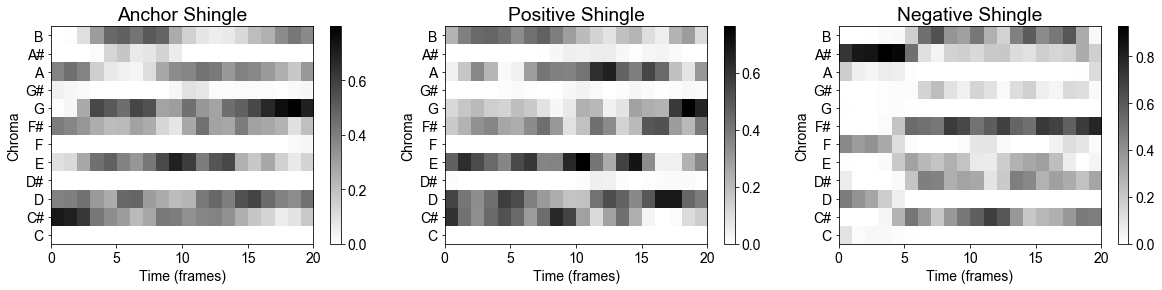

<Figure size 432x288 with 0 Axes>

In [23]:
for i in range(1):
    monitor.find_difficult_triplet()
    monitor.display_triplet(save=True)
    

From the previously displayed plots, we can see how both anchor (left colum) and positive (middle column) shingles have most of their energy concentraded in the same chroma bands at the approximate same time, thus being musically similar.

Furthermore, it is also shown how anchor and negative (right column) need not be similar at all.

# Monitoring Triplet

So far we have seen how our triplets look like, reassuring the fact that $S^a$ and $S^p$ are musically similar, whereas $S^a$ and $S^n$ are musically dissimilar. 
<br><br>
Now, we will see what is actually happening to the triplets during the training procedure of the network. For this purpose, having a fixed triplet that we are monitoring, the Euclidean distances between the embeddings are computed for each epoch. 
<br><br>
The network used to compute the embeddings used triplet loss with a margin of $\alpha=1.3$. The model was trained for 10 epochs using the ADAM optimizer with an initial learning rate of 0.001.

In [ ]:
monitor.find_difficult_triplet()
monitor.display_triplet()

In [ ]:
monitor.monitor_over_epochs(init_epoch=0, end_epoch=5, verbose=1)

From the previous data and the plot displayed in the following cell, we can see how the network learns to cluster anchor and positive embeddings, while pushing negative away.

 - At epoch 0, before the training, all shingles are close together, even being the negative the closest to the anchor. Therefore, the loss is high as the Triplet loss condition is not fulfilled.
 - At epoch 1, the network has learned to generate embeddings that are different for $S^a$ and $S^n$. Consequently, the distance between the two generated shingles becomes much larger. Nevertheless, the margin condition is not fulfilled (1.3 > 1.4025 - 0.2651), thus the loss is not 0.
 - During the final epochs, the network learns to map the positive shingle as close as posible to the anchor, while keeping the negative still separated by a margin $\alpha$. Therefore, the loss becomes 0 (or close to 0).

In [ ]:
monitor.display_distance_over_epochs()

<div class="alert" style="background-color:#F5F5F5; border-color:#C8C8C8">
This notebook was created by Angel Villar-Corrales
</div> 